In [252]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np

signals = [[], [], [], [], []]  # time, x, y, z, magnitude

with open('frontpocket_validation.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    index = 0
    # Due to rounding errors, some seconds come out the same.
    # We take the first of the two measurements
    last_second = -1
    for line in reader:
        if not index == 0:
            nums = [float(x) for x in line]
            if not nums[0] == last_second:
                signals[0].append(nums[0])
                signals[1].append(nums[1])
                signals[2].append(nums[2])
                signals[3].append(nums[3])
                last_second = nums[0]
        index += 1
    print(len(signals[0]))

260162


260162


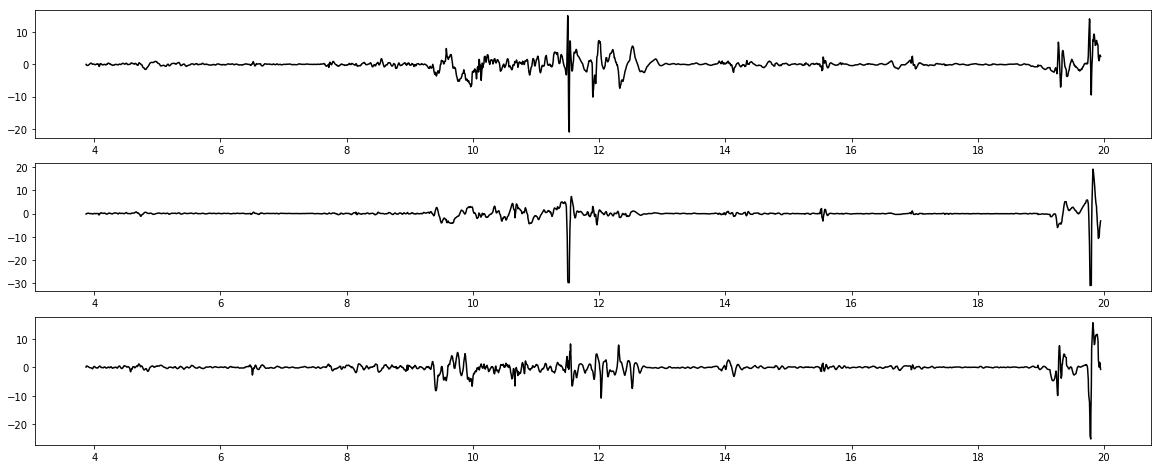

In [256]:
fig = plt.figure(figsize=(20, 8))
print(len(signals[0]))
index1, index2 = (0, 3200)
ax = fig.add_subplot(311)
ax.plot(signals[0][index1:index2], signals[1][index1:index2], 'k')
bx = fig.add_subplot(312)
bx.plot(signals[0][index1:index2], signals[2][index1:index2], 'k')
cx = fig.add_subplot(313)
cx.plot(signals[0][index1:index2], signals[3][index1:index2], 'k')
plt.show()

In [257]:
from scipy.interpolate import interp1d

#start_index, end_index = (800, 2600)  # front pocket 4 steps
#start_index, end_index = (400, 25430)  # front pocket gates
#start_index, end_index = (1375, 47600)  # front pocket 1
#start_index, end_index = (1280, 47500)  # front pocket 2
#start_index, end_index = (1200, 25100)  # front pocket 3
#start_index, end_index = (1200, 18800)  # back pocket 1
#start_index, end_index = (970, 46250)  # back pocket 2

start_index, end_index = (3150, 257800)  # front pocket validation
#start_index, end_index = (3100, 264750)  # back pocket validation

num_samples = int(200 * (signals[0][end_index] - signals[0][start_index]))

xnew = np.linspace(signals[0][start_index], signals[0][(end_index-1)], num=num_samples, endpoint=True)
interp1 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[1][start_index:end_index]),
                  kind='linear')
interp2 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[2][start_index:end_index]),
                  kind='linear')
interp3 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[3][start_index:end_index]),
                  kind='linear')
i_signals = [xnew, interp1(xnew), interp2(xnew), interp3(xnew)]

In [258]:
from scipy.signal import butter, filtfilt, firwin, lfilter, argrelmin

def norm(x_list):
    return math.sqrt(sum(i**2 for i in x_list))

def lowpass_filter_butterworth(x_in, f_c=40, f_s=200, order=5):
    b, a = butter(order, f_c/ (0.5 * f_s), btype='low', analog=False)
    x_out = filtfilt(b, a, x_in)
    return x_out

#def lowpass_filter_fir(x_in, sample_rate, cutoff_f, trans_width=5.0, ripple_db=60.0):
#    nyq_rate = sample_rate / 2.0
#    width = trans_width / nyq_rate
#    N, beta = kaiserord(ripple_db, width)
#    
#    taps = firwin(N, cutoff_f / nyq_rate, window=('kaiser', beta))
#    x_out = lfilter(taps, 1.0, x_in)
#    return x_out

i_signals[1] = lowpass_filter_butterworth(i_signals[1], 40, 200, 5)
i_signals[2] = lowpass_filter_butterworth(i_signals[2], 40, 200, 5)
i_signals[3] = lowpass_filter_butterworth(i_signals[3], 40, 200, 5)
#filter_signal = lowpass_filter_fir(interp_signal, 200, 40)

norms = [norm([i_signals[1][i], i_signals[2][i], i_signals[3][i]]) for i in range(len(i_signals[0]))]
i_signals.append(norms)

filtered_norms = lowpass_filter_butterworth(norms, 3, 200, 5)

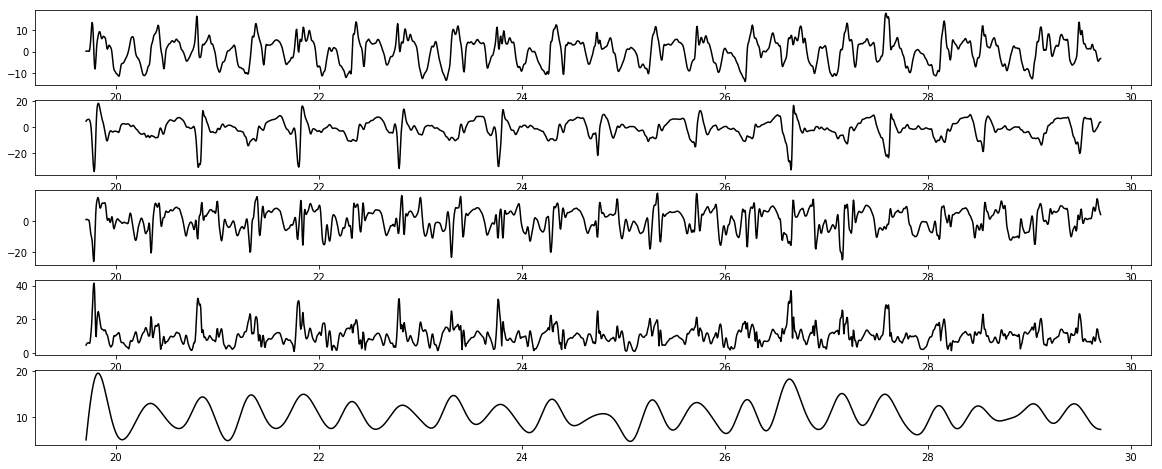

In [259]:
fig = plt.figure(figsize=(20, 8))
index1, index2 = (0, 2000)
ax = fig.add_subplot(511)
ax.plot(i_signals[0][index1:index2], i_signals[1][index1:index2], 'k')
bx = fig.add_subplot(512)
bx.plot(i_signals[0][index1:index2], i_signals[2][index1:index2], 'k')
cx = fig.add_subplot(513)
cx.plot(i_signals[0][index1:index2], i_signals[3][index1:index2], 'k')
dx = fig.add_subplot(514)
dx.plot(i_signals[0][index1:index2], i_signals[4][index1:index2], 'k')
ex = fig.add_subplot(515)
ex.plot(i_signals[0][index1:index2], filtered_norms[index1:index2], 'k')
plt.show()

In [261]:
mins = argrelmin(filtered_norms)[0]
print(mins.shape)
print(mins[0])
interval_sizes = [mins[i+2]- mins[i] for i in range(0, mins.size - 2, 2)]
print(interval_sizes)

(3047,)
71
[208, 204, 197, 193, 199, 189, 182, 195, 162, 199, 208, 177, 173, 197, 193, 182, 198, 170, 207, 187, 187, 188, 190, 187, 191, 189, 200, 199, 188, 197, 197, 161, 222, 206, 151, 136, 187, 112, 194, 197, 192, 192, 202, 180, 201, 186, 205, 189, 201, 194, 198, 190, 197, 188, 178, 190, 214, 199, 186, 204, 186, 184, 211, 196, 142, 141, 101, 191, 188, 200, 210, 206, 201, 187, 190, 192, 205, 191, 198, 185, 201, 199, 195, 188, 195, 189, 187, 195, 193, 167, 208, 164, 124, 187, 187, 204, 183, 192, 188, 202, 170, 225, 159, 180, 180, 187, 186, 225, 153, 186, 197, 194, 174, 208, 176, 183, 188, 205, 188, 176, 128, 179, 199, 177, 188, 182, 195, 199, 188, 181, 201, 206, 192, 193, 160, 106, 194, 193, 194, 186, 202, 201, 187, 196, 103, 157, 204, 195, 199, 198, 175, 181, 116, 194, 214, 180, 212, 186, 186, 184, 207, 194, 197, 177, 188, 196, 189, 205, 180, 192, 184, 202, 201, 189, 190, 199, 191, 203, 191, 197, 200, 184, 195, 194, 198, 187, 202, 195, 188, 192, 182, 197, 197, 197, 184, 194, 194, 193

In [262]:
new_interp1 = interp1d(np.array(i_signals[0]), np.array(i_signals[1]), kind='linear')
new_interp2 = interp1d(np.array(i_signals[0]), np.array(i_signals[2]), kind='linear')
new_interp3 = interp1d(np.array(i_signals[0]), np.array(i_signals[3]), kind='linear')

with open('frontpocket_validation_filtered.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for i in range(0, mins.size - 2, 2):
        new_t = np.linspace(i_signals[0][mins[i]], i_signals[0][mins[i+2]], 200, endpoint=False)
        new_x = new_interp1(new_t)
        new_y = new_interp2(new_t)
        new_z = new_interp3(new_t)
        new_norm = np.array([norm([new_x[i], new_y[i], new_z[i]]) for i in range(200)])
        tensor = np.concatenate((new_x, new_y, new_z, new_norm))
        csvwriter.writerow(tensor)